In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import urllib.request
import zipfile
import glob
from torch.utils.data import DataLoader

/Users/gwanpil/opt/anaconda3/envs/stock_prediction/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(glob.glob('/Users/gwanpil/Documents/GitHub/cycada_release/preprocessing/Dataset/twin/image/*'))


['/Users/gwanpil/Documents/GitHub/cycada_release/preprocessing/Dataset/twin/image/28', '/Users/gwanpil/Documents/GitHub/cycada_release/preprocessing/Dataset/twin/image/21', '/Users/gwanpil/Documents/GitHub/cycada_release/preprocessing/Dataset/twin/image/07', '/Users/gwanpil/Documents/GitHub/cycada_release/preprocessing/Dataset/twin/image/normal', '/Users/gwanpil/Documents/GitHub/cycada_release/preprocessing/Dataset/twin/image/14']


In [12]:
dataset = datasets.ImageFolder(root='/Users/gwanpil/Documents/GitHub/cycada_release/preprocessing/Dataset/twin/image', 
                                    transform=transforms.Compose([
                                        transforms.ToTensor(), 
                                    ])
                                   )

In [6]:
dataset.class_to_idx

{'07': 0, '14': 1, '21': 2, '28': 3, 'normal': 4}

In [13]:
train_loader = torch.utils.data.DataLoader(dataset,         # image_folder를 지정
                                           batch_size=128,# 배치사이즈 지정
                                           shuffle=True,        # shuffle 여부 지정
                                           num_workers=8)       # num_workers 지정


In [8]:
# 1개 batch 추출
images, labels = next(iter(train_loader))

In [9]:
images.shape, labels.shape
# 128장의 RGB, 600*1200의 이미지가 1개의 batch로 구성됨

(torch.Size([128, 3, 600, 1200]), torch.Size([128]))

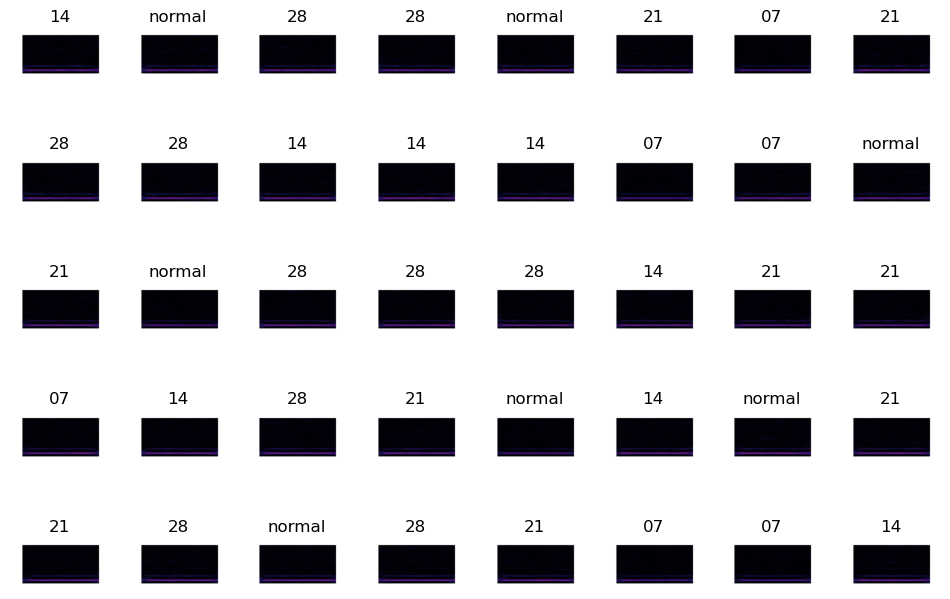

In [14]:
import matplotlib.pyplot as plt
# ImageFolder의 속성 값인 class_to_idx를 할당
labels_map = {v:k for k, v in dataset.class_to_idx.items()}

figure = plt.figure(figsize=(12, 8))
cols, rows = 8, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(torch.permute(img, (1, 2, 0)))
plt.show()

In [15]:
from torch.utils.data import random_split


ratio = 0.8 # 학습셋(train set)의 비율을 설정합니다.

train_size = int(ratio * len(dataset))
test_size = len(dataset) - train_size
print(f'total: {len(dataset)}\ntrain_size: {train_size}\ntest_size: {test_size}')

# random_split으로 8:2의 비율로 train / test 세트를 분할합니다.
train_data, test_data = random_split(dataset, [train_size, test_size])

total: 2250
train_size: 1800
test_size: 450


In [19]:
batch_size = 32 # batch_size 지정
num_workers = 8 # Thread 숫자 지정 (병렬 처리에 활용할 쓰레드 숫자 지정)

train_loader = DataLoader(train_data, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=num_workers
                         )
test_loader = DataLoader(test_data, 
                         batch_size=batch_size,
                         shuffle=False, 
                         num_workers=num_workers
                        )

In [20]:
images, labels = next(iter(train_loader))
images.shape, labels.shape


(torch.Size([32, 3, 600, 1200]), torch.Size([32]))

In [21]:
device = torch.device("cpu")
print(device)

cpu


In [24]:
import torch.nn as nn

In [23]:
# cpu로 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [28]:
num_channels = 3
image_size = (600,1200)#28
name = 'LeNet'
out_dim = 500 # dim of last feature layer


conv_params = nn.Sequential(
        nn.Conv2d(num_channels, 20, kernel_size=5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(20, 50, kernel_size=5),
        nn.Dropout2d(p=0.5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        )

fc_params = nn.Linear(50*4*4, 500)
classifier = nn.Sequential(
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(500, 5) #num_cls)
        )
